In [1]:

def clear_all():
    """Clears all the variables from the workspace """
    gl = globals().copy()
    for var in gl:
        if var[0] == '_': continue
        if 'func' in str(globals()[var]): continue
        if 'module' in str(globals()[var]): continue

        del globals()[var]
if __name__ == "__main__":
    clear_all()



In [2]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
from gensim.models import KeyedVectors
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
from imblearn.under_sampling import RandomUnderSampler
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import *
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from keras.optimizers import RMSprop
from tensorflow import keras
import multiprocessing
cores = multiprocessing.cpu_count()
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
from sklearn import utils
from keras.utils import to_categorical
import warnings
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# import emoji
!pip install contractions
import contractions
from sklearn.metrics import classification_report
import os
from os.path import join, exists
from keras.utils.data_utils import get_file
import sys
import time
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from collections import defaultdict
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 


In [4]:
# function to extract only words, by excluding punctuation and other symbols
def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = contractions.fix(review) #to change words like "don't" to "do not"
    review = re.sub("([^\x00-\x7F])+"," ",review) #removing non-english words
#     review = word_tokenize(review) 
#     review = remove_stop_words(review) #remove stop words
#     review = ' '.join(review)
    return review

# #function to remove  stopwords
# StopWords_path = 'http://www.site.uottawa.ca/~diana/csi5180/StopWords'
# StopWords = pd.read_csv(StopWords_path, header=None)
# english_stop_words = StopWords[0].values.tolist()
# # english_stop_words = stopwords.words('english')
# def remove_stop_words(corpus):
#     removed_stop_words = []
#     for review in corpus:
#         removed_stop_words.append(
#             ''.join([word for word in review.split() 
#                       if word not in english_stop_words])
#         )
#     removed_stop_words = list(filter(lambda x: x != '', removed_stop_words))
#     return removed_stop_words


def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [5]:
def plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

In [6]:
def undersampleData(train_X, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
    return X_resampled, y_resampled

In [7]:
Data_path = 'questions.csv'
Data = pd.read_csv(Data_path)

In [8]:
embedding_dim = 300
max_features = 5000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a question to use

In [9]:
Data.drop(Data[Data.isnull().any(axis=1)].index,inplace=True)
Data['question1'] = Data['question1'].astype('str')
Data['question2'] = Data['question2'].astype('str')
train, test = train_test_split(Data, test_size=0.1)

In [10]:
train['question1'] = train.question1.apply(clean_data)
train['question2'] = train.question2.apply(clean_data)
test['question1'] = test.question1.apply(clean_data)
test['question2'] = test.question2.apply(clean_data)

In [11]:
train, validation = train_test_split(train, test_size=0.1)

In [12]:
doc2vec = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)


In [13]:
import nltk
from nltk.corpus import stopwords
train['questions'] = train['question1'] + " " + train['question2']
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['questions']), tags=[r.is_duplicate]), axis=1)
doc2vec.build_vocab([x for x in train_tagged])

In [14]:
print("Train Data Shape:",train.shape)
print("Validation Data Shape:",validation.shape)
print("Test Data Shape :",test.shape)

print("Train Data : \n",train["is_duplicate"].value_counts())
print("\nValidation Data : \n",validation["is_duplicate"].value_counts())
print("\nTest Data :\n",test["is_duplicate"].value_counts())

Train Data Shape: (327521, 7)
Validation Data Shape: (36392, 6)
Test Data Shape : (40435, 6)
Train Data : 
 0    206573
1    120948
Name: is_duplicate, dtype: int64

Validation Data : 
 0    23073
1    13319
Name: is_duplicate, dtype: int64

Test Data :
 0    25396
1    15039
Name: is_duplicate, dtype: int64


In [15]:
train_sentence1 = train['question1'].values
train_sentence2 = train['question2'].values

validation_sentence1 = validation['question1'].values
validation_sentence2 = validation['question2'].values

test_sentence1 = test['question1'].values
test_sentence2 = test['question2'].values

In [16]:
NUM_WORDS = 300000

print('Found %s samples.' % len(train_sentence1))

train_sentences = train_sentence1 + train_sentence2

tokenizer = Tokenizer(num_words = NUM_WORDS)
tokenizer.fit_on_texts(train_sentences)

sentence1_word_sequences = tokenizer.texts_to_sequences(train_sentence1)
sentence2_word_sequences = tokenizer.texts_to_sequences(train_sentence2)

validation_sentence1_word_sequences = tokenizer.texts_to_sequences(validation_sentence1)
validation_sentence2_word_sequences = tokenizer.texts_to_sequences(validation_sentence2)

test_sentence1_word_sequences = tokenizer.texts_to_sequences(test_sentence1)
test_sentence2_word_sequences = tokenizer.texts_to_sequences(test_sentence2)


word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 327521 samples.
Found 73298 unique tokens.


In [17]:
len(doc2vec.wv.vocab) 

45048

In [18]:
nb_words = min(NUM_WORDS, len(word_index)) + 1

embedding_matrix = np.zeros((nb_words, embedding_dim))
for word, i in word_index.items():
#     if i >= NUM_WORDS:
#         continue
    if word in doc2vec.wv.vocab:
        embedding_matrix[i] = doc2vec.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Null word embeddings: 28305


In [19]:
embedding_matrix.shape

(73299, 300)

In [20]:
inp = Input(shape=(maxlen,))
x = Embedding(len(word_index) +1, embedding_dim, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(100, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
# sgd = SGD(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

W0412 20:30:03.501993  2348 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0412 20:30:03.565822  2348 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0412 20:30:03.580782  2348 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0412 20:30:03.607710  2348 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0412 20:30:03.609704  2348 deprecation_wrapper.py:119] 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          21989700  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 200)          320800    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                3216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17  

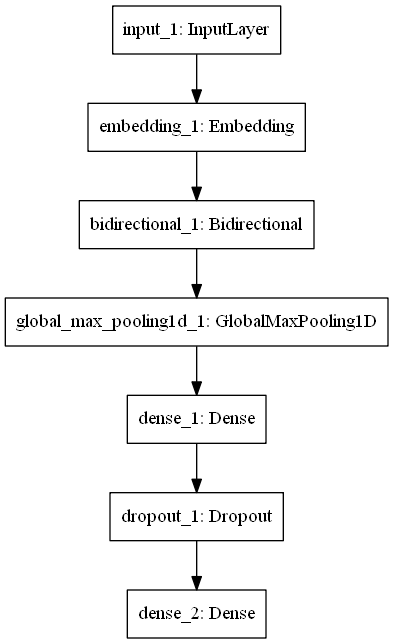

In [21]:
import pydot
# from keras.utils.vis_utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes=False)
# Image(filename ='model.png')

In [22]:
train_s1 = pad_sequences(sentence1_word_sequences, maxlen = maxlen)
train_s2 = pad_sequences(sentence2_word_sequences, maxlen = maxlen)
validation_s1 = pad_sequences(validation_sentence1_word_sequences, maxlen = maxlen)
validation_s2 = pad_sequences(validation_sentence2_word_sequences, maxlen = maxlen)
test_s1 = pad_sequences(test_sentence1_word_sequences, maxlen = maxlen)
test_s2 = pad_sequences(test_sentence2_word_sequences, maxlen = maxlen)


In [23]:
validation_label = validation["is_duplicate"].values
test_label = test["is_duplicate"].values


In [24]:
X_train = train_s1 + train_s2
y_train = train["is_duplicate"].values
X_resampled, y_resampled = undersampleData(X_train, y_train)


Train Data Shape: (241896, 100)
Train Data : 
 1    120948
0    120948
Name: 0, dtype: int64


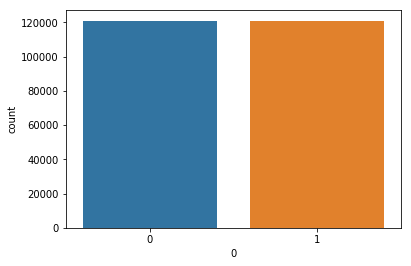

In [25]:
print("Train Data Shape:",X_resampled.shape)
y = pd.DataFrame(y_resampled)
print("Train Data : \n",y[0].value_counts())

sns.countplot(y[0],label="Count")
plt.show()

Train on 241896 samples, validate on 36392 samples
Epoch 1/10
241896/241896 [==============================] - 551s 2ms/step - loss: 0.6144 - acc: 0.6591 - val_loss: 0.5822 - val_acc: 0.6908
Epoch 2/10
241896/241896 [==============================] - 420s 2ms/step - loss: 0.5280 - acc: 0.7382 - val_loss: 0.5694 - val_acc: 0.7038
Epoch 3/10
241896/241896 [==============================] - 544s 2ms/step - loss: 0.4671 - acc: 0.7789 - val_loss: 0.5883 - val_acc: 0.6995
Epoch 4/10
241896/241896 [==============================] - 550s 2ms/step - loss: 0.4096 - acc: 0.8109 - val_loss: 0.6400 - val_acc: 0.6898
Epoch 5/10
241896/241896 [==============================] - 444s 2ms/step - loss: 0.3556 - acc: 0.8391 - val_loss: 0.6874 - val_acc: 0.6859
Epoch 6/10
241896/241896 [==============================] - 309s 1ms/step - loss: 0.3077 - acc: 0.8630 - val_loss: 0.7486 - val_acc: 0.6877
Epoch 7/10
241896/241896 [==============================] - 347s 1ms/step - loss: 0.2669 - acc: 0.8823 - val_

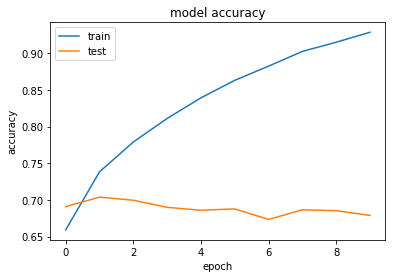

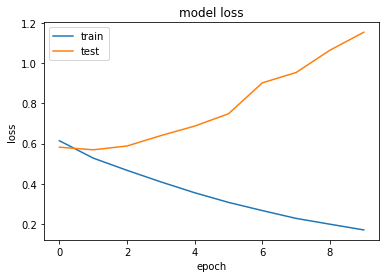

In [26]:
history = model.fit(X_resampled, y_resampled, batch_size=1024, epochs=10, validation_data=(validation_s1 + validation_s2, validation_label))
plotting(history)


In [27]:
loss, acc = model.evaluate(validation_s1 + validation_s2, validation_label , verbose=1)
print('Validation Accuracy: %f' % (acc*100))

36392/36392 [==============================] - 547s 15ms/step
Validation Accuracy: 67.885799


In [28]:
test_label_pred = model.predict(test_s1 + test_s2, batch_size=32, verbose=1)

print("Accuracy:",metrics.accuracy_score(test_label, test_label_pred.round()))

40435/40435 [==============================] - 606s 15ms/step
Accuracy: 0.6727340175590454


              precision    recall  f1-score   support

           0       0.78      0.66      0.72     25396
           1       0.55      0.69      0.61     15039

    accuracy                           0.67     40435
   macro avg       0.67      0.68      0.66     40435
weighted avg       0.70      0.67      0.68     40435



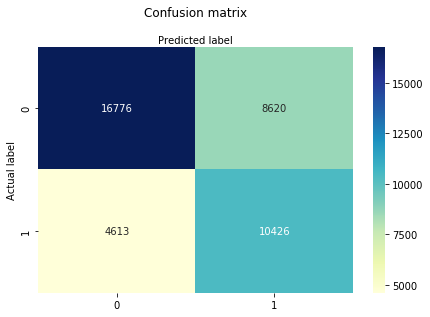

In [29]:
test["Predicted Output"] = test_label_pred.round()
print(classification_report(test["is_duplicate"], test_label_pred.round()))
cnf_matrix = metrics.confusion_matrix(test["is_duplicate"], test_label_pred.round())
confusion_matrix(cnf_matrix)